# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [2]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [5]:
dados.shape

(76840, 7)

#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [6]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [7]:
dados['UF'].value_counts()

,count
UF,
São Paulo,8544
Minas Gerais,7686
Rio Grande do Sul,6322
Bahia,5717
Rio de Janeiro,5556
Pará,4449
Paraná,4356
Pernambuco,3820
Goiás,3478


In [8]:
estados = dados['UF'].value_counts().reset_index()

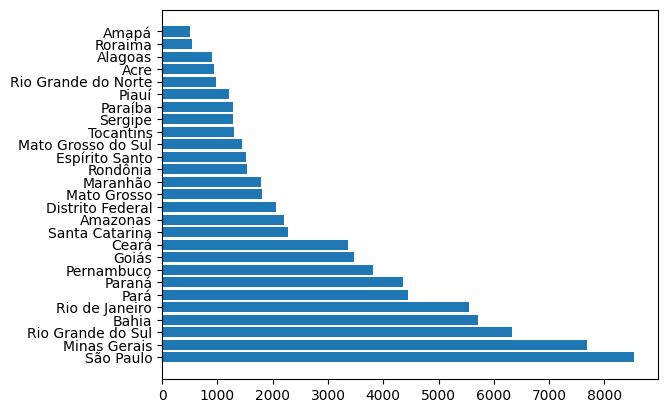

In [9]:
plt.barh(estados['UF'], estados['count'])
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [10]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

In [11]:
dados['categoria_sexo'] = pd.Categorical(
    dados['Sexo'],
    categories=[0,1]
)

dados['categoria_cor'] = pd.Categorical(
    dados['Cor'],
    categories=[0,2,4,6,8]
)

dados['categoria_anos_de_estudo'] = pd.Categorical(
    dados['Anos.de.Estudo'],
    categories=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    ordered=True
)

##### Sexo

In [12]:
dados['categoria_sexo'] = dados['categoria_sexo'].map(sexo)

In [13]:
dados['categoria_sexo']

,categoria_sexo
0,Masculino
1,Feminino
2,Feminino
3,Masculino
4,Feminino
...,...
76835,Feminino
76836,Masculino
76837,Masculino
76838,Masculino


##### Cor

In [14]:
dados['categoria_cor']

,categoria_cor
0,8
1,2
2,8
3,2
4,8
...,...
76835,2
76836,4
76837,8
76838,8


In [15]:
dados['categoria_cor'] = dados['categoria_cor'].map(cor)

In [16]:
dados['categoria_cor']

,categoria_cor
0,Parda
1,Branca
2,Parda
3,Branca
4,Parda
...,...
76835,Branca
76836,Preta
76837,Parda
76838,Parda


##### Anos de Estudo

In [17]:
dados['categoria_anos_de_estudo']

,categoria_anos_de_estudo
0,12
1,12
2,15
3,6
4,9
...,...
76835,11
76836,7
76837,12
76838,4


In [18]:
dados['categoria_anos_de_estudo'] = dados['categoria_anos_de_estudo'].map(anos_de_estudo)

In [19]:
dados['categoria_anos_de_estudo']

,categoria_anos_de_estudo
0,11 anos
1,11 anos
2,14 anos
3,5 anos
4,8 anos
...,...
76835,10 anos
76836,6 anos
76837,11 anos
76838,3 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [20]:
print(f"A menor renda encontrada foi de R${min(dados['Renda'])} e a maior renda foi de R${max(dados['Renda'])}")

A menor renda encontrada foi de R$0 e a maior renda foi de R$200000


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [21]:
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,categoria_sexo,categoria_cor,categoria_anos_de_estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


In [22]:
# 1. Criar a tabela de frequência absoluta
frequencia_abs = dados['categoria_sexo'].value_counts().reset_index()
frequencia_abs.columns = ['categoria_sexo', 'Frequência Absoluta']
# 2. Calcular a frequência relativa (em porcentagem)
frequencia_abs['Frequência Relativa (%)'] = (frequencia_abs['Frequência Absoluta'] / frequencia_abs['Frequência Absoluta'].sum()) * 100
# 3. Visualizar a tabela final
print(frequencia_abs)


  categoria_sexo  Frequência Absoluta  Frequência Relativa (%)
0      Masculino                53250                69.299844
1       Feminino                23590                30.700156


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [23]:
tab_freq_sexo_raca = pd.crosstab(dados['categoria_sexo'], dados['categoria_cor'])
tab_freq_sexo_raca

categoria_cor,Indígena,Branca,Preta,Amarela,Parda
categoria_sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [24]:
tab_freq_sexo_raca_relativa = pd.crosstab(dados['categoria_cor'],dados['categoria_sexo'], normalize='columns') * 100
tab_freq_sexo_raca_relativa = round(tab_freq_sexo_raca_relativa, 1)
tab_freq_sexo_raca_relativa

categoria_sexo,Masculino,Feminino
categoria_cor,,
Indígena,0.5,0.4
Branca,41.7,40.8
Preta,10.3,12.2
Amarela,0.4,0.5
Parda,47.1,46.0


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [25]:
tab_renda_por_sexo_cor = round(pd.crosstab(dados['categoria_sexo'], dados['categoria_cor'], values = dados['Renda'], aggfunc='mean'),2)
tab_renda_por_sexo_cor

categoria_cor,Indígena,Branca,Preta,Amarela,Parda
categoria_sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Escreva suas conclusões aqui...

Verificamos uma predominância masculina como pessoas responsáveis pelo domicílio num indíce de 70% a 30% mulheres. Verificamos também que a maioria destes homens se autodenominam brancos ou pardos, num índice de 41 e 47% respectivamente. Quanto ao cruzamento de raça e sexo, os índices são similares entre raça e sexo, o mais notável seria o de mulheres negras, que compõe 12% dos dados, em comparação aos 10% dos homens negros. Os outros dados não ultrapassam muito mais de 1% de diferença entre sexo. Quando analisamos renda por sexo e raça, verificamos que os homens amarelos tem a média salarial maior, seguido das mulheres amarelas. Os salários masculinos são, num geral, significativamente maiores do que suas contrapartes femininas de mesma raça, com exceção das mulheres indígenas que tem uma média salarial de R\$ 2464 em comparação a média de R\$ 1081 dos masculinos indígenas.



## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [26]:
renda_tendencia = {
'media': dados['Renda'].mean(),
    'mediana': dados['Renda'].median(),
    'moda': dados['Renda'].mode()[0]
}
renda_tendencia

{'media': np.float64(2000.3831988547631),
 'mediana': 1200.0,
 'moda': np.int64(788)}

#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [27]:
top5_estados = (
    dados.groupby('UF')['Renda']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

print(top5_estados)

                 UF        Renda
0  Distrito Federal  4241.954722
1         São Paulo  2638.104986
2    Rio de Janeiro  2496.403168
3            Paraná  2493.870753
4    Santa Catarina  2470.854945


/tmp/ipython-input-28-1390280249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


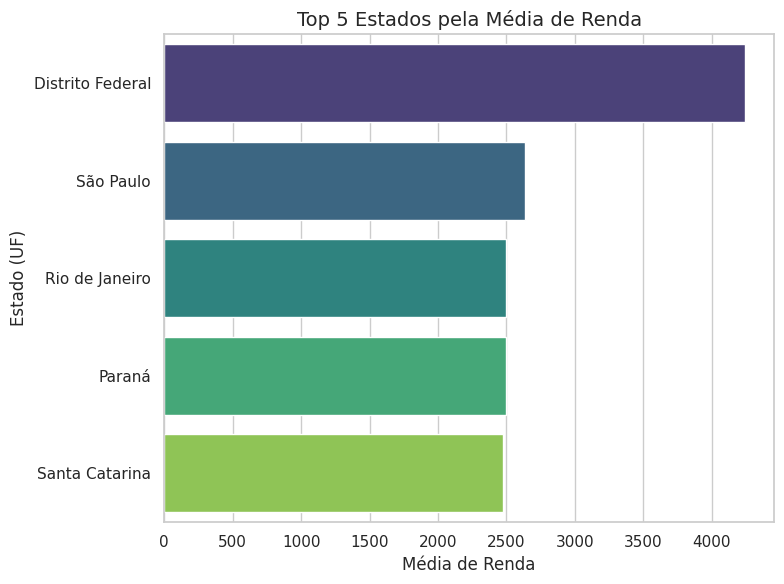

In [28]:

# Configurações estéticas
sns.set(style="whitegrid")

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top5_estados,
    x='Renda',
    y='UF',
    palette='viridis'
)

# Adicionar títulos e labels
plt.title('Top 5 Estados pela Média de Renda', fontsize=14)
plt.xlabel('Média de Renda')
plt.ylabel('Estado (UF)')

plt.tight_layout()
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [29]:
# Definir lista de estados da Região Sudeste
sudeste = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']

# Filtrar dados apenas da Região Sudeste
dados_sudeste = dados[dados['UF'].isin(sudeste)]


##### **Média**

In [30]:
tabela_media = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='categoria_sexo',
    aggfunc='mean'
)

print(tabela_media)


categoria_sexo    Masculino     Feminino
UF                                      
Espírito Santo  2129.324226  1752.707022
Minas Gerais    2283.158288  1489.616576
Rio de Janeiro  2777.552792  1971.532508
São Paulo       2947.742872  1950.176471


/tmp/ipython-input-30-1264169857.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_media = pd.pivot_table(


##### **Mediana**

In [31]:
tabela_mediana = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='categoria_sexo',
    aggfunc='median'
)

print(tabela_mediana)


categoria_sexo  Masculino  Feminino
UF                                 
Espírito Santo     1500.0     927.0
Minas Gerais       1400.0     900.0
Rio de Janeiro     1510.0    1040.5
São Paulo          1820.0    1200.0


/tmp/ipython-input-31-2485964502.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_mediana = pd.pivot_table(


##### **Renda Máxima**

In [32]:
tabela_max = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='categoria_sexo',
    aggfunc='max',
    observed=False
)

print(tabela_max)

categoria_sexo  Masculino  Feminino
UF                                 
Espírito Santo      40000    100000
Minas Gerais       100000     30000
Rio de Janeiro     200000    120000
São Paulo           80000     50000


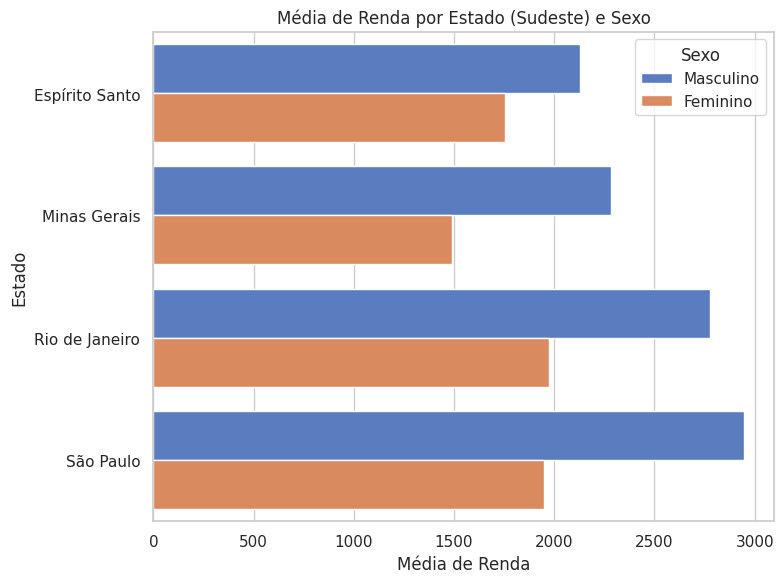

In [33]:
tabela_media_plot = tabela_media.reset_index().melt(id_vars='UF', var_name='Sexo', value_name='Média Renda')

plt.figure(figsize=(8,6))
sns.barplot(
    data=tabela_media_plot,
    x='Média Renda',
    y='UF',
    hue='Sexo',
    palette='muted'
)

plt.title('Média de Renda por Estado (Sudeste) e Sexo')
plt.xlabel('Média de Renda')
plt.ylabel('Estado')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


> #### Conclusões

A média de salário (tanto para homens quanto para mulheres) em São Paulo é o maior entre todos os Estados, com um diferencial mínimo para mulheres no Rio de Janeiro. Contudo, a máxima masculina encontrada no Rio de Janeiro é mais que o dobro da máxima encontrada em São Paulo.

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

In [34]:
mtc_altura = {
    'Média': dados['Altura'].mean(),
    'Mediana': dados['Altura'].median(),
    'Moda': dados['Altura'].mode().iloc[0]
}

print("MTC - Altura:", mtc_altura)


MTC - Altura: {'Média': np.float64(1.6995084591358667), 'Mediana': 1.7, 'Moda': np.float64(1.7)}


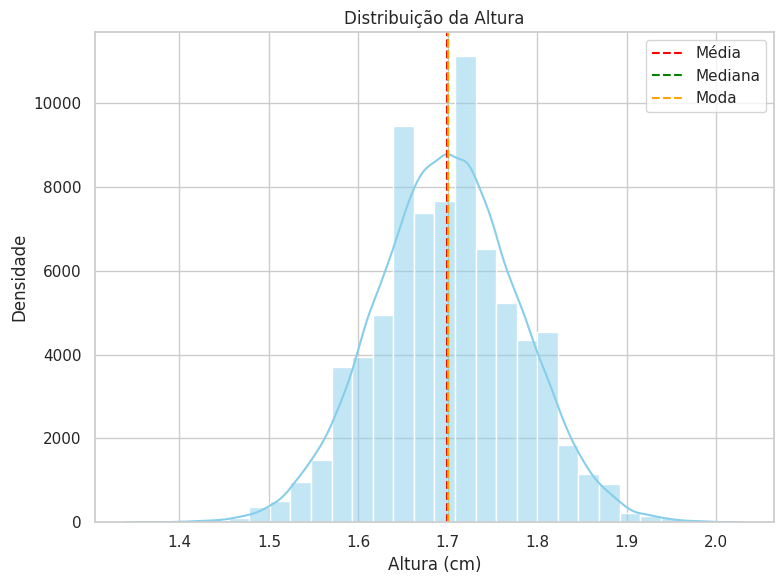

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(
    dados['Altura'],
    kde=True,
    color='skyblue',
    bins=30
)

# Adicionar linhas das MTCs
plt.axvline(mtc_altura['Média'], color='red', linestyle='--', label='Média')
plt.axvline(mtc_altura['Mediana'], color='green', linestyle='--', label='Mediana')
plt.axvline(mtc_altura['Moda'], color='orange', linestyle='--', label='Moda')

plt.title('Distribuição da Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()


> #### Conclusões

Considerando que a média é levemente menor que a meidana e a moda, significa que o gráfico tem uma mínima (quase nula) assimetria à esquerda. Significa que a maioria dos dados se encontram acima da média, mas existem mais outliers a esquerda.

##### **Idade**

In [36]:
mtc_idade = {
    'Média': dados['Idade'].mean(),
    'Mediana': dados['Idade'].median(),
    'Moda': dados['Idade'].mode().iloc[0]
}
print("MTC - Idade:", mtc_idade)

MTC - Idade: {'Média': np.float64(44.07142113482561), 'Mediana': 43.0, 'Moda': np.int64(40)}


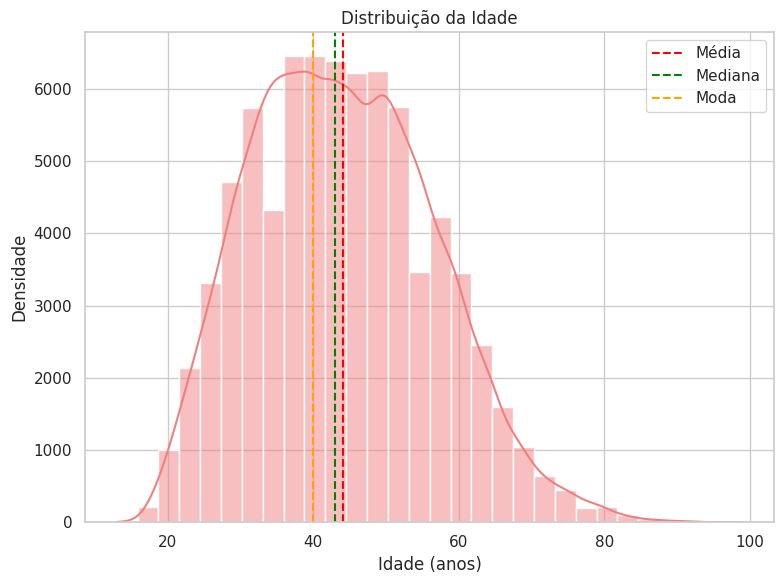

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(
    dados['Idade'],
    kde=True,
    color='lightcoral',
    bins=30
)

# Adicionar linhas das MTCs
plt.axvline(mtc_idade['Média'], color='red', linestyle='--', label='Média')
plt.axvline(mtc_idade['Mediana'], color='green', linestyle='--', label='Mediana')
plt.axvline(mtc_idade['Moda'], color='orange', linestyle='--', label='Moda')

plt.title('Distribuição da Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()


> #### Conclusões

O gráfico de idade já demonstra uma acentuidade maior em sua assimetria à direita, considerando que a moda se encontra nos 40 anos, com a mediana nos 43 anos e a média aos 44. Ao contrário, significa que a maioria dos dados estão concentrados abaixo da média, mas encontramos mais outliers em idades avançadas.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [38]:
import math

In [39]:
renda_filtrada = dados[dados['Renda'] <= 15000]['Renda']


In [40]:
n = len(renda_filtrada)
k = int(1 + (10/3) * math.log10(n))

In [41]:
faixas = dados[dados['Renda'] <= 15000].copy()
faixas['faixa Rendas'] = pd.cut(faixas['Renda'], bins=k)

print(faixas['faixa Rendas'].value_counts())

faixa Rendas
(-15.0, 882.353]          26311
(882.353, 1764.706]       25816
(1764.706, 2647.059]      10905
(2647.059, 3529.412]       4854
(4411.765, 5294.118]       2180
(3529.412, 4411.765]       2133
(5294.118, 6176.471]       1002
(6176.471, 7058.824]        672
(9705.882, 10588.235]       662
(7941.176, 8823.529]        554
(14117.647, 15000.0]        267
(11470.588, 12352.941]      218
(7058.824, 7941.176]        208
(8823.529, 9705.882]        193
(10588.235, 11470.588]       97
(12352.941, 13235.294]       78
(13235.294, 14117.647]       69
Name: count, dtype: int64


In [42]:
bins = np.linspace(renda_filtrada.min(), renda_filtrada.max(), k + 1)

faixas['faixa Rendas'] = pd.cut(faixas['Renda'], bins=bins)

faixas

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,categoria_sexo,categoria_cor,categoria_anos_de_estudo,faixa Rendas
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(0.0, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(0.0, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(0.0, 882.353]"
...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos,"(0.0, 882.353]"
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos,"(882.353, 1764.706]"
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos,"(882.353, 1764.706]"
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos,"(882.353, 1764.706]"


#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [43]:
nove_cinco = faixas['Renda'].quantile(0.95)
nove_cinco

np.float64(5500.0)

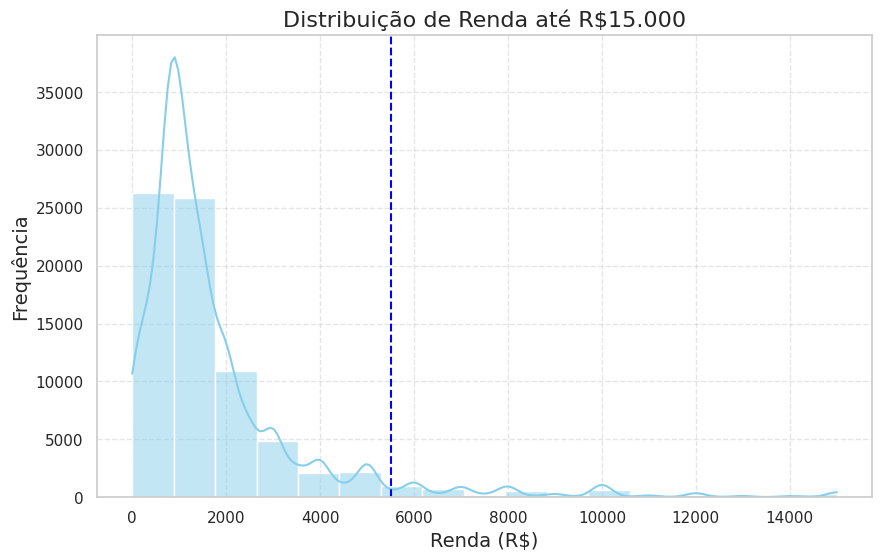

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(renda_filtrada, bins=bins, kde=True, color='skyblue')

plt.axvline(nove_cinco, color='blue', linestyle='dashed')

# Adicionar informações no gráfico
plt.title('Distribuição de Renda até R$15.000', fontsize=16)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [45]:
nove_nove = faixas['Renda'].quantile(0.99)
nove_nove

np.float64(10000.0)

> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [46]:
salario_minimo = 788.00
total_responsaveis = dados.shape[0]
ate_um_salario = dados[dados['Renda'] <= salario_minimo].shape[0]
percentual = (ate_um_salario / total_responsaveis) * 100
print(f'O percentual de pessoas responsáveis que ganhavam até um salário mínimo em 2015 é de {percentual:.2f}%')

O percentual de pessoas responsáveis que ganhavam até um salário mínimo em 2015 é de 28.87%


##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [47]:
renda_maxima = dados['Renda'].quantile(0.95)

print(f'A renda máxima de 95% de pessoas responsáveis na pesquisa é de R${renda_maxima:.2f}')

A renda máxima de 95% de pessoas responsáveis na pesquisa é de R$6000.00


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [48]:
renda_minima = dados['Renda'].quantile(0.99)

print(f'A renda mínima dos 1% mais bem pagos da pesquisa é de R${renda_minima:.2f}')

A renda mínima dos 1% mais bem pagos da pesquisa é de R$15000.00


##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [49]:
seis_mil = dados[dados['Renda'] <= 6000].sort_values('Renda').reset_index(drop=True)
seis_mil

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,categoria_sexo,categoria_cor,categoria_anos_de_estudo
0,Bahia,1,61,8,5,0,1.66,Feminino,Parda,4 anos
1,Ceará,0,20,8,6,0,1.72,Masculino,Parda,5 anos
2,Ceará,1,49,8,1,0,1.67,Feminino,Parda,Sem instrução e menos de 1 ano
3,Ceará,1,52,8,2,0,1.67,Feminino,Parda,1 ano
4,Ceará,1,48,8,16,0,1.73,Feminino,Parda,15 anos ou mais
...,...,...,...,...,...,...,...,...,...,...
73188,Bahia,0,55,8,12,6000,1.62,Masculino,Parda,11 anos
73189,São Paulo,0,39,2,16,6000,1.56,Masculino,Branca,15 anos ou mais
73190,Rio Grande do Sul,0,55,2,16,6000,1.83,Masculino,Branca,15 anos ou mais
73191,Distrito Federal,0,39,2,12,6000,1.74,Masculino,Branca,11 anos


In [50]:
quartis = {
    'Q1' : seis_mil['Renda'].quantile(0.25),
    'Q2' : seis_mil['Renda'].quantile(0.5),
    'Q3' : seis_mil['Renda'].quantile(0.75),
}

quartis

{'Q1': np.float64(788.0), 'Q2': np.float64(1200.0), 'Q3': np.float64(2000.0)}

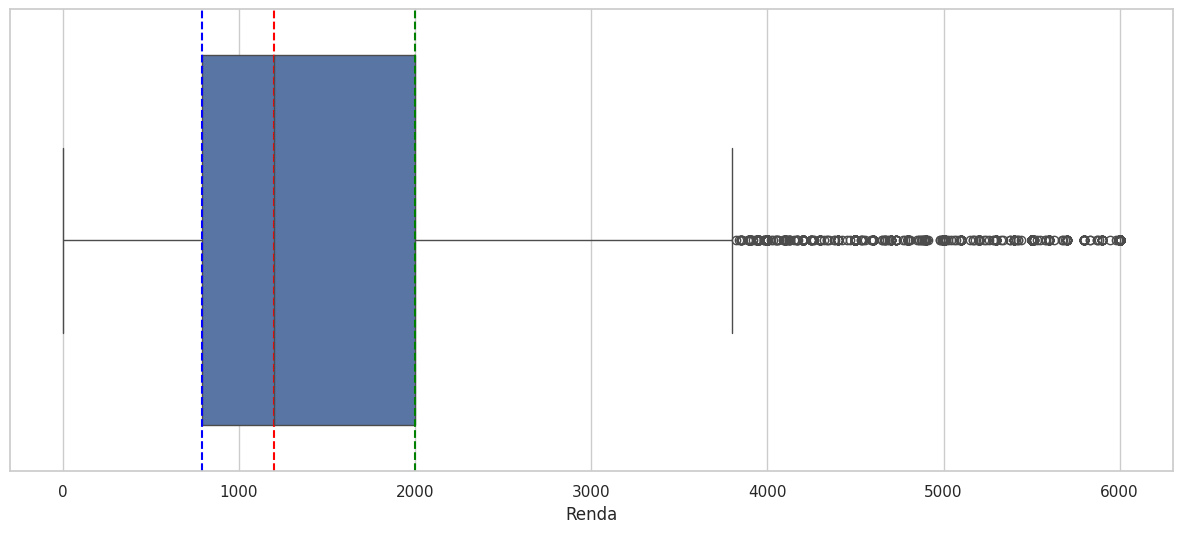

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(x=seis_mil['Renda'])
plt.axvline(quartis['Q1'], color='blue', linestyle='dashed')
plt.axvline(quartis['Q2'], color='red', linestyle='dashed')
plt.axvline(quartis['Q3'], color='green', linestyle='dashed')

plt.show()

> #### Conclusões

Portanto, dos responsáveis que recebem até R$6.000:
 25% das pessoas responsáveis recebem um salário de no máximo R\$ 788, enquanto 50% das mesmas recebem um salário até R\$ 1.200, e as pessoas até 75% dos dados recebem um salário de até R\$ 2.000.

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

In [52]:
seisk_noventa_cinco = seis_mil['Renda'].quantile(0.95)

renda_6k_95 = seis_mil[seis_mil['Renda'] <= seisk_noventa_cinco]

renda_6k_95.tail()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,categoria_sexo,categoria_cor,categoria_anos_de_estudo
69794,São Paulo,0,53,2,12,4000,1.75,Masculino,Branca,11 anos
69795,Rondônia,0,57,8,7,4000,1.57,Masculino,Parda,6 anos
69796,Minas Gerais,0,34,2,8,4000,1.78,Masculino,Branca,7 anos
69797,Rio Grande do Norte,1,37,2,16,4000,1.61,Feminino,Branca,15 anos ou mais
69798,São Paulo,0,51,2,9,4000,1.60,Masculino,Branca,8 anos


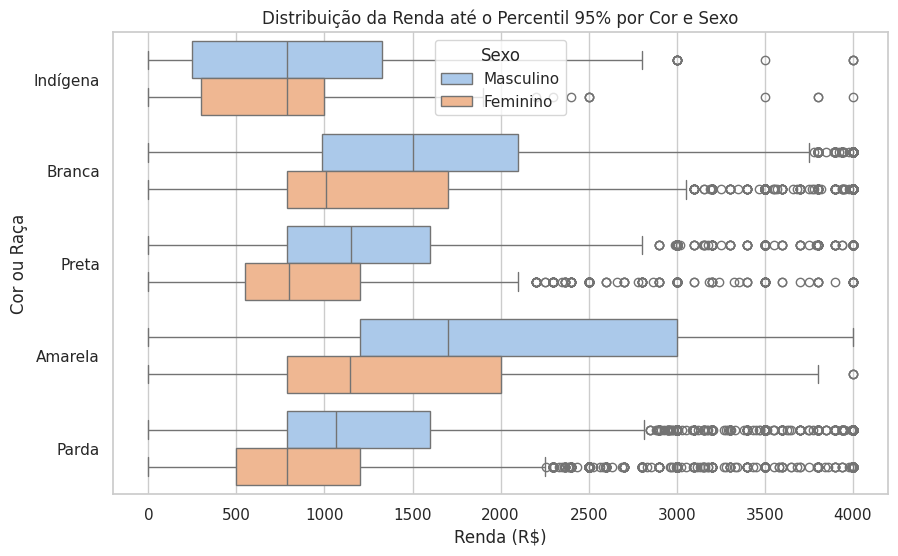

In [53]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Renda', y='categoria_cor', data=renda_6k_95, hue='categoria_sexo', palette='pastel')

plt.title('Distribuição da Renda até o Percentil 95% por Cor e Sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')
plt.legend(title='Sexo')

plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

In [54]:
#Por redundância, testando dois métodos
idade = dados['Idade'].sort_values(ascending=False).reset_index(drop=True)

idade_20 = idade.tail(15368)

idade_20

,Idade
61472,33
61473,33
61474,33
61475,33
61476,33
...,...
76835,15
76836,15
76837,15
76838,14


In [55]:
idade_limite = dados['Idade'].quantile(0.20)
print(f"A idade limite para os 20% mais jovens é {idade_limite} anos.")

A idade limite para os 20% mais jovens é 33.0 anos.


**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

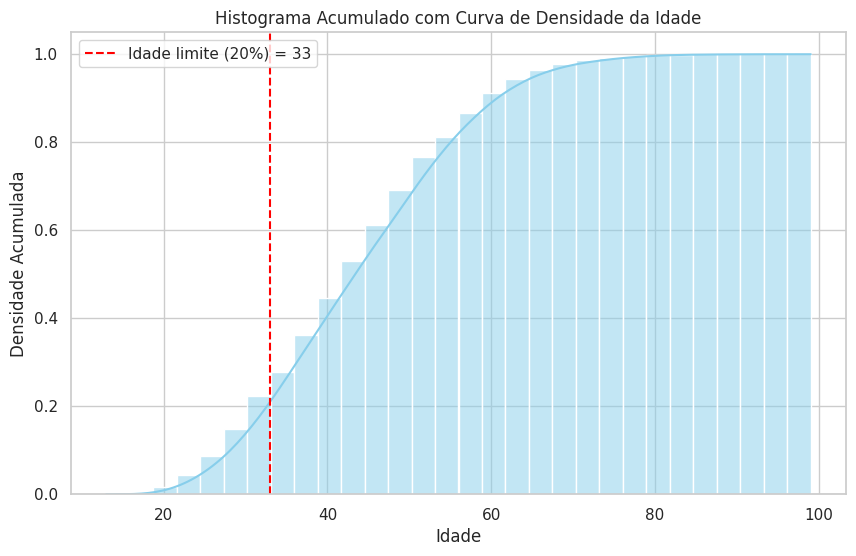

In [56]:
plt.figure(figsize=(10,6))

sns.histplot(
    dados['Idade'],
    bins=30,
    kde=True,
    cumulative=True,
    stat="density",
    color='skyblue'
)

plt.axvline(x=idade_limite, color='red', linestyle='--', label=f'Idade limite (20%) = {idade_limite:.0f}')
plt.title('Histograma Acumulado com Curva de Densidade da Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade Acumulada')
plt.legend()
plt.show()

> #### Conclusões

A idade máxima onde encontramos 20% da população amostral é de 33 anos, ou seja, 20% das amostras coletadas tem 33 anos ou menos.


## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [59]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,categoria_sexo,categoria_cor,categoria_anos_de_estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [64]:
dados['Renda'].describe()[['mean', '50%']]

,Renda
mean,2000.383199
50%,1200.000000


In [63]:
estatisticas_operacional = dados['Renda'].agg(
    media='mean',
    mediana='median',
    variancia='var',
    desvio_padrao='std',
    mad=lambda x: (abs(x- x.mean())).mean()
).reset_index()
estatisticas_operacional

,index,Renda
0,media,2.000383e+03
1,mediana,1.200000e+03
2,variancia,1.104491e+07
3,desvio_padrao,3.323388e+03
4,mad,1.526495e+03


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [65]:
tabela_renda_estudo = dados.groupby('Anos.de.Estudo')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index().sort_values(by='Anos.de.Estudo')

tabela_renda_estudo

,Anos.de.Estudo,media,mediana,desvio_padrao
0,1,732.994187,600.0,955.274843
1,2,806.524496,700.0,1203.866292
2,3,842.560209,788.0,1298.873800
3,4,980.044275,788.0,1907.138437
4,5,1150.439293,900.0,1293.144934
5,6,1183.575683,940.0,1328.709017
6,7,1284.082618,1000.0,1326.140204
7,8,1289.166233,1000.0,1279.412081
8,9,1437.744862,1100.0,1404.280340
9,10,1315.685870,1000.0,1888.373952


> #### Conclusões

A média de renda por anos de estudo é sempre maior que a mediana, acelerando em uma proporção maior conforme acumulam os anos de estudos. O que nos dá a entender que existem bastante outliers acima do gráfico, ou seja, pessoas que recebem muito acima do ponto médio de salários. O desvio padrão tem um comportamento mais imprevisível, com períodos de subida e quedas bruscas.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [71]:
dados_filtrados = dados[dados['Renda'] <= 15000]

# Criar a tabela com estatísticas por Anos de Estudo
tabela_estatisticas = dados_filtrados.groupby('categoria_sexo')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index().sort_values(by='categoria_sexo')

tabela_estatisticas

/tmp/ipython-input-71-4190872505.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_estatisticas = dados_filtrados.groupby('categoria_sexo')['Renda'].agg(


,categoria_sexo,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

A média do salário masculino é maior, como comprovado nas análises anteriores. A mediana também, o que nos faz perceber que os dados num geral são maiores. O desvio padrão contudo também é maior para o sexo masculino, o que nos faz perceber que existe uma variação maior (apesar de existir uma proporção na progressão dos dados entre sexo) para homens.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

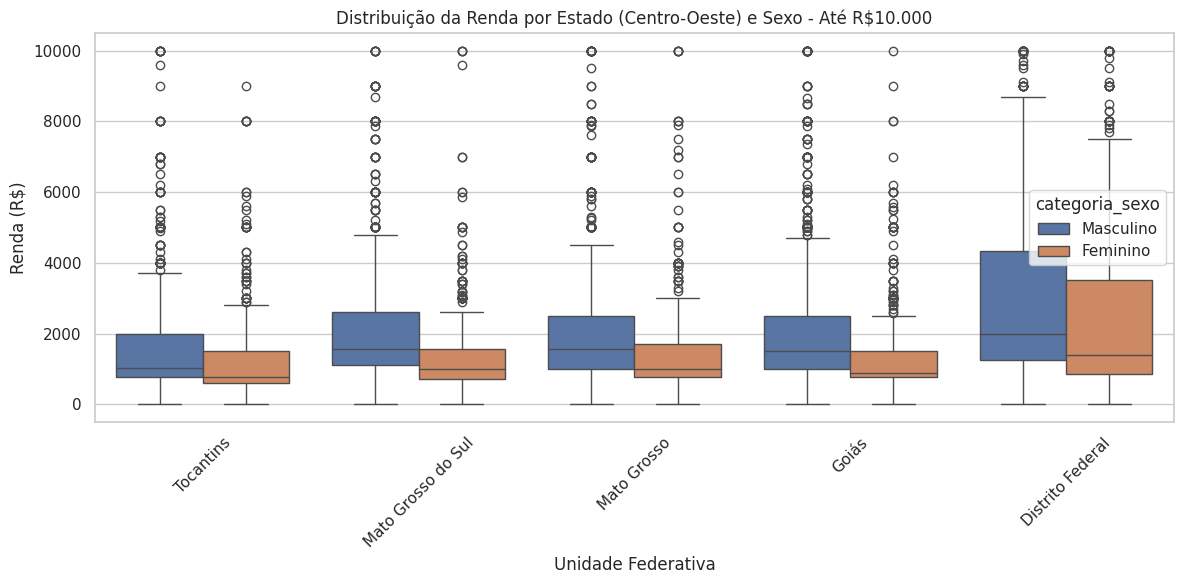

In [72]:
# 1. Filtrar dados da região Centro-Oeste até R$10.000
ufs_co = ['Goiás', 'Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul', 'Tocantins']
dados_co = dados[
    (dados['UF'].isin(ufs_co)) &
    (dados['Renda'] <= 10000)
]

# 2. Boxplot da Renda por UF com hue=categoria_sexo
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_co, x='UF', y='Renda', hue='categoria_sexo')
plt.title('Distribuição da Renda por Estado (Centro-Oeste) e Sexo - Até R$10.000')
plt.ylabel('Renda (R$)')
plt.xlabel('Unidade Federativa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Média**

In [74]:
media_renda = dados_co.pivot_table(
    values='Renda',
    index='UF',
    columns='categoria_sexo',
    aggfunc='mean'
).round(2)

print("📊 Média da Renda (R$):")
display(media_renda)

📊 Média da Renda (R$):


/tmp/ipython-input-74-3669113498.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  media_renda = dados_co.pivot_table(


categoria_sexo,Masculino,Feminino
UF,,
Distrito Federal,3138.46,2551.87
Goiás,2030.06,1284.65
Mato Grosso,2092.10,1548.93
Mato Grosso do Sul,2181.73,1396.69
Tocantins,1598.92,1381.80


##### **Mediana**

In [75]:
mediana_renda = dados_co.pivot_table(
    values='Renda',
    index='UF',
    columns='categoria_sexo',
    aggfunc='median'
).round(2)

print("\n📊 Mediana da Renda (R$):")
display(mediana_renda)


📊 Mediana da Renda (R$):


/tmp/ipython-input-75-788018900.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mediana_renda = dados_co.pivot_table(


categoria_sexo,Masculino,Feminino
UF,,
Distrito Federal,2000.0,1400.0
Goiás,1500.0,900.0
Mato Grosso,1560.0,1000.0
Mato Grosso do Sul,1576.0,986.0
Tocantins,1020.0,788.0


##### **Desvio Padrão**

In [77]:
desvio_padrao_renda = dados_co.pivot_table(
    values='Renda',
    index='UF',
    columns='categoria_sexo',
    aggfunc='std'
).round(2)

print("\n📊 Desvio Padrão da Renda (R$):")
display(desvio_padrao_renda)


📊 Desvio Padrão da Renda (R$):


/tmp/ipython-input-77-932945439.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  desvio_padrao_renda = dados_co.pivot_table(


categoria_sexo,Masculino,Feminino
UF,,
Distrito Federal,2513.43,2451.17
Goiás,1587.38,1110.00
Mato Grosso,1707.91,1508.59
Mato Grosso do Sul,1773.44,1400.90
Tocantins,1632.05,1516.37


In [78]:
from IPython.display import display, HTML

html_tabelas = f"""
<div style="display: flex; gap: 20px; justify-content: space-around;">
  <div>
    <h4>Média da Renda (R$)</h4>
    {media_renda.to_html()}
  </div>
  <div>
    <h4>Mediana da Renda (R$)</h4>
    {mediana_renda.to_html()}
  </div>
  <div>
    <h4>Desvio Padrão da Renda (R$)</h4>
    {desvio_padrao_renda.to_html()}
  </div>
</div>
"""

display(HTML(html_tabelas))


categoria_sexo,Masculino,Feminino
UF,,
Distrito Federal,3138.46,2551.87
Goiás,2030.06,1284.65
Mato Grosso,2092.10,1548.93
Mato Grosso do Sul,2181.73,1396.69
Tocantins,1598.92,1381.80
categoria_sexo,Masculino,Feminino
UF,,
Distrito Federal,2000.0,1400.0
Goiás,1500.0,900.0


> #### Conclusões

Tocantins é o Estado com maior equidade entre os sexos da região Centro-Oeste, o Distrito Federal apresenta as maiores médias e medianas, mas é também o maior desvio padrão, o que nos leva a crer que existe uma diferença grande, em ambos os sexos, entre os salários dos responsáveis. Goiás tem o menor desvio pardão da renda para ambos os sexos, o que sugere rendas mais similares.